# Análises Além Tutorial

<br>

# Carregando Conjunto de Dados

In [1]:
import pandas as pd

dados_balancear = pd.read_csv('dados_balancear.csv', delimiter=',')

# Balanceamento de Classes

## Utilizando o sexo como atributo sensível

## Oversampling

In [6]:
from imblearn.over_sampling import RandomOverSampler

#criando modelo de oversampling
over_sampler = RandomOverSampler(random_state=99)

In [7]:
#realizando reamostragem oversampling, utilizando o sexo como rótulo para o balanceamento
x_over, y_over = over_sampler.fit_resample(dados_balancear.drop(['sex'], axis=1), dados_balancear['sex'])

In [8]:
#concatenando dataframes gerados pelo over sampler, para recolocar o sexo como variável explicativa e mais50k como variável resposta
x_over['sex'] = y_over
dados_over = x_over

dados_over_y = dados_over['mais50k']
dados_over_x = dados_over.drop(['mais50k'], axis=1)

In [9]:
#contagem da realização do oversampling
dados_over_x['sex'].value_counts()

Female    32650
Male      32650
Name: sex, dtype: int64

In [10]:
#convertendo variáveis categóricas
dados_over_x_dummies = pd.get_dummies(dados_over_x)

In [12]:
#função que executa a classificação justa
def executa_classificacao(classificador, x, y, atributo_sensivel):
    paridade_demografica = DemographicParity()

    #criação de um segundo classificador de Árvore de Decisão
    #classificador = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

    mitigator = ExponentiatedGradient(classificador, paridade_demografica)

    #realizando o treino do modelo justo e utilizando o sexo como atributo sensível
    mitigator.fit(x, y, sensitive_features=atributo_sensivel)

    #previsão dos dados utilizando o modelo justo
    #y_pred_mitigated = mitigator.predict(x)
    return mitigator.predict(x)

#função que calcula as métricas agrupadas
def calcula_metricas(y_true, y_pred, atributo_sensivel):
    #agrupamento de métricas para cálculo com MetricFrame
    metricas = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'false positive rate': false_positive_rate,
        'true positive rate': true_positive_rate,
        'selection rate': selection_rate,
        'count': count
    }

    return MetricFrame(
        metrics=metricas,
        y_true=y_true,
        y_pred=y_pred,
        sensitive_features=atributo_sensivel
    )

In [22]:
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate, count
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

arvore_decisao_oversampling = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

dados_over_prev = executa_classificacao(arvore_decisao_oversampling, dados_over_x_dummies, dados_over_y, dados_over_x['sex'])

In [27]:
#calcula métricas para os dados com oversampling
resultado_oversampling = calcula_metricas(dados_over_y, dados_over_prev, dados_over_x['sex'])

print(resultado_oversampling.overall)
resultado_oversampling.by_group

accuracy               0.844579
precision              0.831753
recall                 0.306816
false positive rate    0.016081
true positive rate     0.306816
selection rate         0.075911
count                     65300
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate,count
sex,,,,,,,
Female,0.927228,0.763109,0.471307,0.017679,0.471307,0.066585,32650
Male,0.76193,0.885375,0.248437,0.014033,0.248437,0.085237,32650


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'count'}, xlabel='sex'>,
        <AxesSubplot:xlabel='sex'>, <AxesSubplot:xlabel='sex'>]],
      dtype=object)

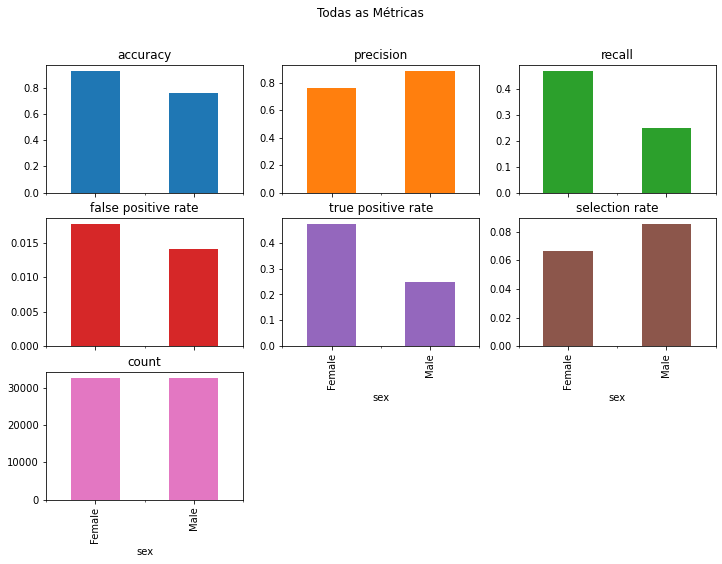

In [29]:
resultado_oversampling.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Todas as Métricas"
)

## Undersampling

In [16]:
from imblearn.under_sampling import RandomUnderSampler

#criando modelo de undersampling
under_sampler = RandomUnderSampler(random_state=99)

In [17]:
#realizando reamostragem undersampling, utilizando o sexo como rótulo para o balanceamento
x_under, y_under = under_sampler.fit_resample(dados_balancear.drop(['sex'], axis=1), dados_balancear['sex'])

In [18]:
#concatenando dataframes gerados pelo under sampler, para recolocar o sexo como variável explicativa e mais50k como variável resposta
x_under['sex'] = y_under
dados_under = x_under

dados_under_y = dados_under['mais50k']
dados_under_x = dados_under.drop(['mais50k'], axis=1)

In [19]:
#contagem da realização do undersampling
dados_under_x['sex'].value_counts()

Male      16192
Female    16192
Name: sex, dtype: int64

In [20]:
#convertendo variáveis categóricas
dados_under_x_dummies = pd.get_dummies(dados_under_x)

In [26]:
#criação do classificador de árvore de decisão

arvore_decisao_undersampling = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

#execução do treino e previsão do modelo justo
dados_under_prev = executa_classificacao(arvore_decisao_undersampling, dados_under_x_dummies, dados_under_y, dados_under_x['sex'])

In [28]:
resultado_undersampling = calcula_metricas(dados_under_y, dados_under_prev, dados_under_x['sex'])

print(resultado_undersampling.overall)
resultado_undersampling.by_group

accuracy               0.846498
precision              0.719844
recall                 0.416292
false positive rate    0.041994
true positive rate     0.416292
selection rate          0.11904
count                     32384
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate,count
sex,,,,,,,
Female,0.919034,0.629525,0.629169,0.045414,0.629169,0.10919,16192
Male,0.773962,0.796358,0.339391,0.037627,0.339391,0.128891,16192


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='sex'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='sex'>],
       [<AxesSubplot:title={'center':'count'}, xlabel='sex'>,
        <AxesSubplot:xlabel='sex'>, <AxesSubplot:xlabel='sex'>]],
      dtype=object)

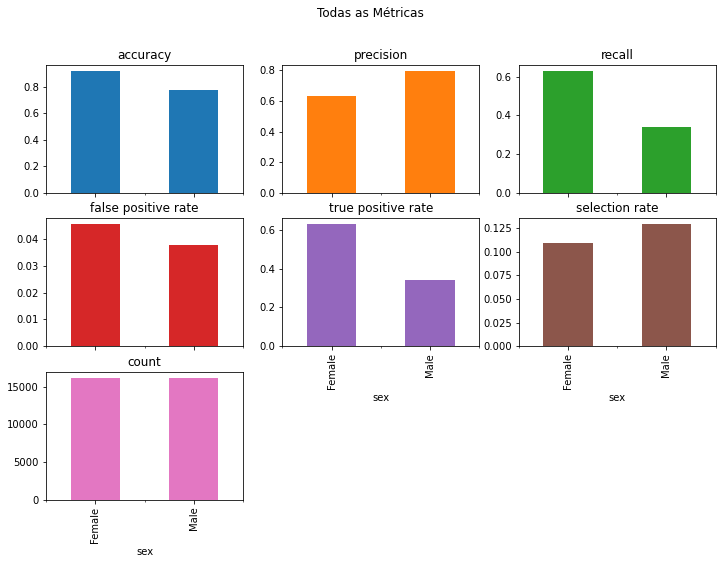

In [30]:
resultado_undersampling.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Todas as Métricas"
)

# Atributo Sensível: Raça

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

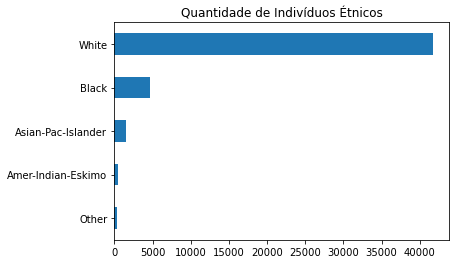

In [39]:
dados_balancear['race'].value_counts().sort_values().plot(kind='barh', title='Quantidade de Indivíduos Étnicos')
race.value_counts()

In [37]:
#separando os dados para execução do modelo
raca_dados_x = dados_balancear.drop(['mais50k'], axis=1)
raca_dados_x_dummies = pd.get_dummies(raca_dados_x)

raca_dados_y = dados_balancear['mais50k']

In [41]:
#criando modelo de previsão
raca_modelo = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)

raca_prev = executa_classificacao(raca_modelo, raca_dados_x_dummies, raca_dados_y, raca_dados_x['race'])

In [42]:
raca_resultados = calcula_metricas(raca_dados_y, raca_prev, raca_dados_x['race'])

print(raca_resultados.overall)
raca_resultados.by_group

accuracy               0.837476
precision              0.720296
recall                 0.524429
false positive rate    0.064056
true positive rate     0.524429
selection rate         0.174215
count                     48842
dtype: object


,accuracy,precision,recall,false positive rate,true positive rate,selection rate,count
race,,,,,,,
Amer-Indian-Eskimo,0.8,0.270588,0.418182,0.149398,0.418182,0.180851,470
Asian-Pac-Islander,0.788677,0.662963,0.437653,0.081982,0.437653,0.177749,1519
Black,0.865315,0.458065,0.627208,0.101966,0.627208,0.165422,4685
Other,0.815271,0.307692,0.4,0.126404,0.4,0.160099,406
White,0.836765,0.759092,0.523428,0.056556,0.523428,0.175135,41762


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='race'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='race'>,
        <AxesSubplot:title={'center':'recall'}, xlabel='race'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='race'>,
        <AxesSubplot:title={'center':'true positive rate'}, xlabel='race'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='race'>],
       [<AxesSubplot:title={'center':'count'}, xlabel='race'>,
        <AxesSubplot:xlabel='race'>, <AxesSubplot:xlabel='race'>]],
      dtype=object)

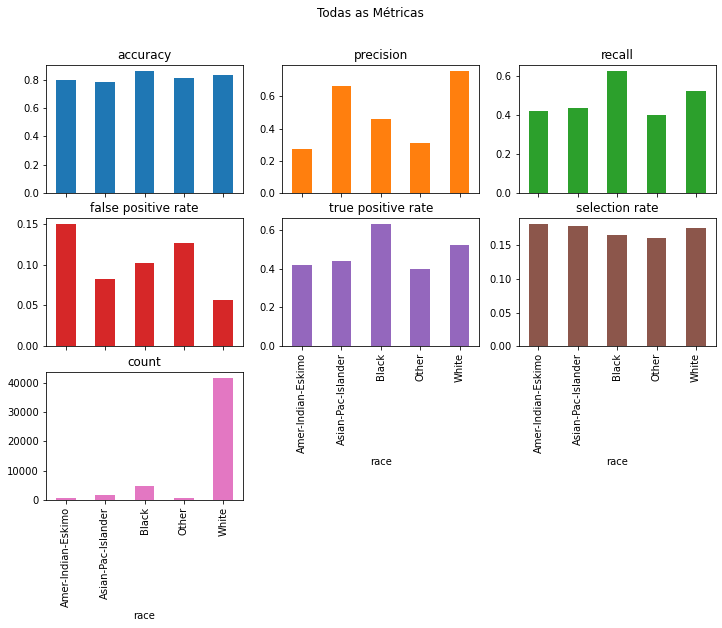

In [43]:
raca_resultados.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12,8],
    title="Todas as Métricas"
)